Linear regression (first degree, errors only on dependent variable)  for the simple linear model:

$$ y  = mx + b $$

with confindence intervals on for $\hat m$ and $\hat b$.


Standard error of $\hat m$:

$${\displaystyle s_{\widehat {\beta }}={\sqrt {\frac {{\frac {1}{n-2}}\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}}$$

Standard error of $\hat b$:

$${\displaystyle s_{\widehat {\alpha }}=s_{\widehat {\beta }}{\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}x_{i}^{2}}}={\sqrt {{\frac {1}{n(n-2)}}\left(\sum _{i=1}^{n}{\widehat {\varepsilon }}_{j}^{\,2}\right){\frac {\sum _{i=1}^{n}x_{i}^{2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}}}$$


Confidence interval for $\hat m$ :


$${\displaystyle \beta \in \left[{\widehat {\beta }}-s_{\widehat {\beta }}t_{n-2}^{*},\ {\widehat {\beta }}+s_{\widehat {\beta }}t_{n-2}^{*}\right]}$$


where ${\displaystyle t_{n-2}^{*}}$ is the ${\displaystyle \scriptstyle \left(1\;-\;{\frac {\gamma }{2}}\right){\text{-th}}}$ quantile of the Student's t distribution with n−2 degrees of freedom. For example, if γ = 0.05 then the confidence level is 95%

Confidence interval for $\hat b$ :

$${\displaystyle \alpha \in \left[{\widehat {\alpha }}-s_{\widehat {\alpha }}t_{n-2}^{*},\ {\widehat {\alpha }}+s_{\widehat {\alpha }}t_{n-2}^{*}\right]}$$

Confidence band around the regression line:

$${\displaystyle (\alpha +\beta \xi )\in \left[\,{\widehat {\alpha }}+{\widehat {\beta }}\xi \pm t_{n-2}^{*}{\sqrt {\left({\frac {1}{n-2}}\sum {\widehat {\varepsilon }}_{i}^{\,2}\right)\cdot \left({\frac {1}{n}}+{\frac {(\xi -{\bar {x}})^{2}}{\sum (x_{i}-{\bar {x}})^{2}}}\right)}}\,\right].}$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy.random as rnd
from matplotlib import style
style.use('ggplot')
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
import ipywidgets as ipyw
import qgrid


In [27]:
# Function to validate input by data type
def check_input(f_type,message):
    """
Wrapper around the input function, reads input
until it matches the required data type. 
    """
    flag = True
    while flag:
        value = input(message)
        try:
            value = f_type(value)
            flag = False
        except ValueError:
            pass
    return value

# Read the number of points and replicates
npoints = check_input(int,"Number of points? ")
nrepl = check_input(int,"Number of replicates? ")

Number of points? 3
Number of replicates? 1


In [28]:
# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
# enz_data.iloc[:,1:4].mean(axis=1)
# enz_data.iloc[:,1:4].std(axis=1)
#
columns = ['x']
columns = columns + ['y'+str(i+1) for i in range(nrepl)]
input_data = pd.DataFrame(np.zeros((npoints, nrepl+1)),columns=columns)
#enz_data = pd.DataFrame(np.hstack([s.reshape(-1,1),v]),columns=columns)
# Create a qgrid table to input the data
qgrid_widget = qgrid.show_grid(input_data, show_toolbar=False)
qgrid_widget.layout = ipyw.Layout(width='50%')
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [45]:
input_data = qgrid_widget.get_changed_df()
input_data['Mean v']=input_data.iloc[:,1:].mean(axis=1)
input_data['Std v']=input_data.iloc[:,1:-1].std(ddof=1.5,axis=1)
#enz_data['fit_error']=enz_data['Mean v']-MM(Km,Vmax,enz_data['[A]'])
input_data

,x,y1,Mean v,Std v
0,1.000,3.200,3.200,nan
1,2.000,4.900,4.900,nan
2,3.000,6.800,6.800,nan


In [46]:
y = np.array(input_data.iloc[:,1:-2])
x = np.array(input_data['x'])

m̂= 1.7999999999999996
b̂= 1.3666666666666691
residuals= 0.006666666666666736


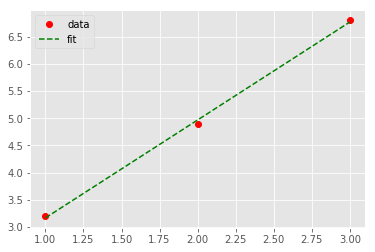

In [47]:
# m̂ b̂ 
# m = 2
# b = 1
# sigma = 1
# N = 10
# bhat = 100
# resi = -1 
# while(abs(bhat-b) > 0.1 or abs(m-mhat) > 0.1):
#   x = np.arange(0, N, 0.3)
#   y = m*x + b + rnd.normal(0,sigma,len(x))
ym = y.mean(axis=1)
(mhat, bhat), [resi], _, _, _ = np.polyfit(x,ym,deg=1,full=True)
plt.plot(x, ym, 'ro', x, mhat*x + bhat,'g--')
plt.legend(["data","fit"])
print("m̂=",mhat)
print("b̂=",bhat)
print("residuals=",resi)


In [48]:
def sdmean(x):
    """
Computes the sum square devation from the mean.
    """
    from numpy import var
    return var(x,ddof=0)*len(x)
#
N=npoints
interval = 0.95 # confidence interval
gamma = 1-interval
SDM = sdmean(x)
sem = np.sqrt(resi/(N-1)/SDM)
seb = sem*np.sqrt((x**2).mean())
tval = t.ppf(1-gamma/2,df=N-2)
print("m estimate:", mhat)
print("b estimate:", bhat)
#print(np.sqrt(sigma**2/SDM))
#print(np.sqrt( sigma**2 * (1/len(x)+x.mean()**2/SDM)))
#print(mbhat)
print(f"{100*interval}% confidence interval for m: ".format(interval),
      [mhat-sem*tval, mhat+sem*tval])
print(f"{100*interval}% confidence interval for b : ".format(interval),
      [bhat-seb*tval, bhat+seb*tval])
print("R**2: (cf. of determination)",1-resi/sdmean(ym))
print("Pearson correlation:",np.corrcoef(x,ym)[0,1])



m estimate: 1.7999999999999996
b estimate: 1.3666666666666691
95.0% confidence interval for m:  [1.7556209297295358, 1.8443790702704634]
95.0% confidence interval for b :  [1.27079691771357, 1.4625364156197682]
R**2: (cf. of determination) 0.9989722507708119
Pearson correlation: 0.9994859932839539


In [50]:
npoints

3